### **Problem Statement:**

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have an image of a digit submitted by a user via a scanner, a tablet, or other digital devices. The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 
 
### **Objective:**

You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits based on the pixel values given as features.


In [2]:
# Import following packages.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### **Undersatanding the data**

In [3]:
# Loading the data.

mnist_train = pd.read_csv("mnist_train.csv")

mnist_test = pd.read_csv("mnist_test.csv")

In [4]:
# View dataframe "mnist_train".

mnist_train

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# View dataframe "mnist_test".

mnist_test

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Renaming columns of mnist_train and mnist_test.

mnist_train.columns = np.arange(len(mnist_train.columns))

mnist_test.columns = np.arange(len(mnist_test.columns))

In [7]:
# View data after renaming the columns.

mnist_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# View data after renaming the columns.

mnist_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Renaming first column as "Label".

mnist_train.rename(columns = {0:'Label'}, inplace = True)

mnist_test.rename(columns = {0:'Label'}, inplace = True)

In [10]:
# Storing "Label" in other variables.

target_tr = mnist_train[["Label"]]

target_test = mnist_test[["Label"]]

In [11]:
# Dropping "Label" from data.

mnist_train.drop(["Label"], axis = 1, inplace = True)

mnist_test.drop(["Label"], axis = 1, inplace = True)

In [12]:
# Adding prefix as "Pixel" to all columns.

mnist_train = mnist_train.add_prefix('Pixel_')

mnist_test = mnist_test.add_prefix('Pixel_')

In [13]:
# Setting indices.

target_tr.reset_index(drop = True, inplace = True)

mnist_train.reset_index(drop = True, inplace = True)

target_test.reset_index(drop = True, inplace = True)

mnist_test.reset_index(drop = True, inplace = True)

In [14]:
# Adding column "Label" back to the data.

mnist_train = pd.concat([mnist_train, target_tr], axis = 1)

mnist_test = pd.concat([mnist_test, target_test], axis = 1)

In [18]:
# Finding out max value in "mnist_train".

mnist_train.max().max()

# Max pixel value is 255.

255

In [19]:
# Finding out min value in "mnist_train".

mnist_train.min().min()

# Min pixel value is 0.

0

In [20]:
# Checking if there are any missing values.

mnist_train.isnull().sum()

Pixel_1      0
Pixel_2      0
Pixel_3      0
Pixel_4      0
Pixel_5      0
            ..
Pixel_781    0
Pixel_782    0
Pixel_783    0
Pixel_784    0
Label        0
Length: 785, dtype: int64

In [21]:
# Checking if there are any missing values.

mnist_test.isnull().sum()

Pixel_1      0
Pixel_2      0
Pixel_3      0
Pixel_4      0
Pixel_5      0
            ..
Pixel_781    0
Pixel_782    0
Pixel_783    0
Pixel_784    0
Label        0
Length: 785, dtype: int64

### **Exploratory data analysis**

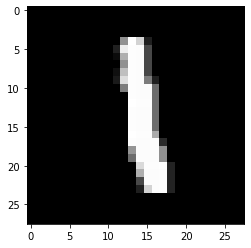

In [22]:
# Visualizing the digits.

data = np.matrix(mnist_train)
output = data[:, 784]
data = np.delete(data, 784, 1)
img = data[5].reshape(28,28)
plt.imshow(img, cmap="gray") 

# Given image is of digit "1".

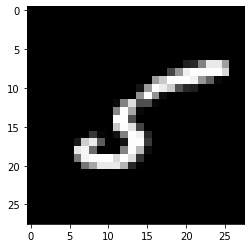

In [23]:
# Visualizing the digits.

data = np.matrix(mnist_train)
output = data[:, 784]
data = np.delete(data, 784, 1)
img = data[10].reshape(28,28)
plt.imshow(img, cmap="gray") 

# Given image is of digit "5".

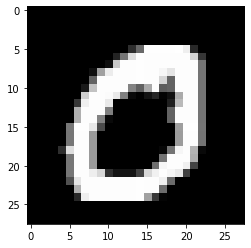

In [24]:
# Visualizing the digits.

data = np.matrix(mnist_train)
output = data[:, 784]
data = np.delete(data, 784, 1)
img = data[50].reshape(28,28)
plt.imshow(img, cmap="gray")

# Given imsge is of digit "0".

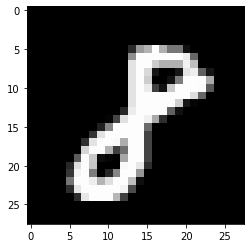

In [28]:
# Visualizing the digits.

data = np.matrix(mnist_train)
output = data[:, 784]
data = np.delete(data, 784, 1)
img = data[30].reshape(28,28)
plt.imshow(img, cmap="gray")

# Given image is of digit "8".

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

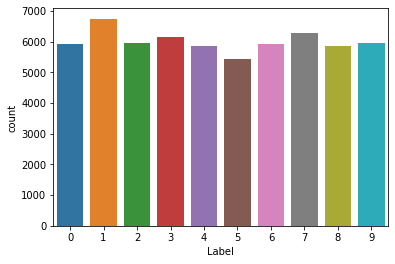

In [31]:
# Checking the distribution of classes.

sns.countplot(mnist_train['Label'])

# Data is more biased towards claas 1.

In [32]:
# Dropping column "Label" before scaling.

target_train = mnist_train["Label"]

target_test = mnist_test["Label"]

mnist_train.drop(["Label"], axis = 1, inplace = True)

mnist_test.drop(["Label"], axis = 1, inplace = True)

In [34]:
# Scaling the data.

mnist_train /= 255

mnist_test /= 255

In [35]:
# Setting indices.

target_train.reset_index(drop = True, inplace = True)

mnist_train.reset_index(drop = True, inplace = True)

target_test.reset_index(drop = True, inplace = True)

mnist_test.reset_index(drop = True, inplace = True)

In [36]:
# Adding "Label" back to the data.

mnist_train = pd.concat([mnist_train, target_train], axis = 1)

mnist_test = pd.concat([mnist_test, target_test], axis = 1)

### **Model building using support vector machines**

In [39]:
# Storing "Label" in y and other variables in "X".

y = mnist_train["Label"]

X = mnist_train.drop(["Label"], axis = 1)

In [ ]:
# Removing "Label" from test data.

test = mnist_test["Label"]

mnist_test.drop(["Label"], axis = 1, inplace = True)

In [40]:
# Splitting data as train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, random_state = 100, stratify = y) 

In [42]:
# Building SVM model with linear kernel.

linear_model = SVC(kernel = 'linear')

linear_model.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
# Predicting the test data.

y_pred = linear_model.predict(mnist_test)

In [51]:
# Generating confusion matrix.

print(metrics.confusion_matrix(test, y_pred))

[[ 952    0    2    1    2   12    9    1    1    0]
 [   0 1117    4    1    1    1    2    3    6    0]
 [  15    9  940   25    8    6    8   10    8    3]
 [   6    2   21  901    2   44    0   10   17    7]
 [   2    0   13    1  921    0   10    3    3   29]
 [  14    5    6   55   10  766   12    3   15    6]
 [  16    3   14    1    6   15  899    3    1    0]
 [   1   13   24   18    6    2    0  931    1   31]
 [  13   11   15   49   16   38    7   13  806    6]
 [   9    6    6    8   48    6    2   32   14  878]]


In [52]:
# Checking the accuracy of the model.

print("accuracy:", metrics.accuracy_score(test, y_pred))

accuracy: 0.9111911191119112


In [53]:
# Building SVM model with "RBF" kernel.

non_linear_model = SVC(kernel = 'rbf')

non_linear_model.fit(X_train, y_train)

SVC()

In [54]:
# Predicting the test data.

y_pred = non_linear_model.predict(mnist_test)

In [55]:
# Generating the confusion matrix.

print(metrics.confusion_matrix(test, y_pred))

[[ 968    0    0    1    0    6    3    1    1    0]
 [   0 1124    2    3    1    2    2    0    1    0]
 [   8    0  976    5    9    0    4   15   15    0]
 [   2    0   12  961    0   14    0   12    8    1]
 [   1    1    3    0  942    0   10    2    2   21]
 [   7    1    3   17    4  840   10    1    5    4]
 [   7    3    2    0    5    8  929    0    4    0]
 [   1   14   21    5    4    0    0  964    3   15]
 [   5    2    4   12    6   13    7    6  917    2]
 [   7    6    3    9   24    7    1    9    4  939]]


In [56]:
# Checking the accuracy of the model.

print("accuracy:", metrics.accuracy_score(test, y_pred))

accuracy: 0.9560956095609561


### **Cross validation to get optimal values of hyperparameters.**

In [58]:
# As cross validation takes more time, taking only small chunk of traing data.

new_train, new_test, new_y_train, new_y_test = train_test_split(X_train, y_train, train_size = 0.2, random_state = 100, stratify = y_train) 

In [61]:
# Creating a KFold object with 5 splits. 

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Specifying range of hyperparameters.

hyper_params = [ {'C': [0.1,0.5,1,2]}]

# Specifying model.

model = SVC(kernel = "linear")

# Setting up GridSearchCV().

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True)      

# Fitting the model.
model_cv.fit(new_train, new_y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   27.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.1, 0.5, 1, 2]}], return_train_score=True,
             scoring='accuracy', verbose=1)

In [62]:
# Cross validation results.

cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.523296,0.011447,0.177925,0.009326,0.1,{'C': 0.1},0.916667,0.895833,0.891667,0.866667,...,0.888225,0.018248,1,0.998957,0.995829,0.998957,0.995829,0.997917,0.997498,0.001415
1,0.518637,0.009660,0.175663,0.005311,0.5,{'C': 0.5},0.916667,0.887500,0.891667,0.862500,...,0.884888,0.019578,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.518443,0.009602,0.175193,0.004655,1,{'C': 1},0.916667,0.887500,0.891667,0.862500,...,0.884888,0.019578,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.519881,0.009642,0.174848,0.002794,2,{'C': 2},0.916667,0.887500,0.891667,0.862500,...,0.884888,0.019578,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [63]:
# Printing the optimal accuracy score and hyperparameters.

best_score = model_cv.best_score_

best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8882252440725245 corresponding to hyperparameters {'C': 0.1}


In [64]:
# Creating model using optimal value of hyperparameter.

model = SVC(C = 0.1, kernel = "linear")

model.fit(X_train, y_train)

y_pred = model.predict(mnist_test)

print(metrics.confusion_matrix(test, y_pred), "\n")

print("accuracy", metrics.accuracy_score(test, y_pred), "\n")

[[ 957    0    1    1    1    8   10    2    0    0]
 [   0 1121    1    3    1    1    3    2    3    0]
 [  13    6  948   12   11    3    9   11   15    4]
 [   7    1   20  922    2   31    0   11   12    4]
 [   2    2    7    1  923    0   13    3    2   29]
 [  10    4    8   40    9  785   13    5   13    5]
 [  11    4    7    1    5   13  914    1    2    0]
 [   1   15   26   10    9    0    0  947    1   18]
 [  10    7   11   44   10   30    8   11  839    4]
 [  10    7    3    9   35    6    1   22   11  905]] 

accuracy 0.9261926192619262 



In [65]:
# Creating a KFold object with 5 splits. 

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Specifying range of hyperparameters.

hyper_params = [ {'gamma': [0.010, 0.02], 'C': [0.1,0.5,1,2]}]

# Specifying model.

model = SVC(kernel = "rbf")

# Setting up GridSearchCV().

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True)      

# Fitting the model.

model_cv.fit(new_train, new_y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 1, 2], 'gamma': [0.01, 0.02]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [66]:
# Cross validation results.

cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.764611,0.012626,0.286978,0.001297,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.745833,0.720833,0.741667,...,0.736464,0.015402,7,0.771637,0.764338,0.755996,0.801877,0.828125,0.784395,0.026794
1,1.838432,0.007084,0.285355,0.001949,0.1,0.02,"{'C': 0.1, 'gamma': 0.02}",0.729167,0.687500,0.704167,...,0.714787,0.020024,8,0.779979,0.776851,0.763295,0.801877,0.819792,0.788359,0.020008
2,1.061180,0.008390,0.239903,0.001429,0.5,0.01,"{'C': 0.5, 'gamma': 0.01}",0.908333,0.879167,0.879167,...,0.884090,0.023104,6,0.945777,0.948905,0.954119,0.946820,0.944792,0.948082,0.003312
3,1.243607,0.006275,0.247973,0.001106,0.5,0.02,"{'C': 0.5, 'gamma': 0.02}",0.912500,0.887500,0.891667,...,0.896611,0.025113,5,0.971846,0.971846,0.977059,0.968717,0.969792,0.971852,0.002870
4,0.910266,0.012975,0.225573,0.004115,1,0.01,"{'C': 1, 'gamma': 0.01}",0.937500,0.891667,0.895833,...,0.905774,0.023600,4,0.971846,0.970803,0.974974,0.968717,0.969792,0.971226,0.002143
5,1.336931,0.023691,0.238990,0.003090,1,0.02,"{'C': 1, 'gamma': 0.02}",0.925000,0.891667,0.912500,...,0.909111,0.019005,2,0.996872,0.990615,0.995829,0.993743,0.992708,0.993954,0.002226
6,0.840401,0.008041,0.215607,0.002303,2,0.01,"{'C': 2, 'gamma': 0.01}",0.929167,0.895833,0.904167,...,0.907441,0.019371,3,0.994786,0.987487,0.994786,0.992701,0.989583,0.991869,0.002903
7,1.457568,0.019203,0.236833,0.001473,2,0.02,"{'C': 2, 'gamma': 0.02}",0.920833,0.900000,0.916667,...,0.911614,0.018449,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [67]:
# Printing the optimal accuracy score and hyperparameters.

best_score = model_cv.best_score_

best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9116143654114366 corresponding to hyperparameters {'C': 2, 'gamma': 0.02}


In [68]:
# Building model using optimal values of hyperparameters. 

model = SVC(C = 2, gamma = 0.02, kernel = "rbf")

model.fit(X_train, y_train)

y_pred = model.predict(mnist_test)

print(metrics.confusion_matrix(test, y_pred), "\n")

print("accuracy", metrics.accuracy_score(test, y_pred), "\n")

[[ 968    0    1    0    0    6    3    1    1    0]
 [   0 1124    2    3    1    1    2    1    1    0]
 [   7    0  994    4    4    0    2   10   11    0]
 [   0    0   11  974    0    9    0    9    6    1]
 [   3    1    3    0  946    0   10    1    0   18]
 [   5    1    1   10    3  857    9    1    3    2]
 [   7    3    0    0    4    8  932    0    4    0]
 [   0   11   20    6    2    0    0  974    2   12]
 [   5    2    1   10    5    7    3    5  933    3]
 [   5    5    4    8   17    5    1   11    5  948]] 

accuracy 0.965096509650965 



### **Conclusions:**

Before cross validation,
* SVM with linear kernel resulted in an accuracy of 91.11%.
* SVM with RBF kernel resulted in an accuracy of 95.60% on the test data.
* Hence SVM with RBF kernel seems to separate classes better than SVM with linear kernel.

After cross validation,
* SVM with linear kernel predicted test data with an accuracy of 92.61%.
* SVM with RBF kernel predicted test data with an accuracy of 96.50%.
* Hence given data can be correctly classified after incorporation of some level of non-linearity (C = 2, gamma = 0.02).

Hence model with RBF kernel works best to predict the given test data.